# Photo Classifier: Model evaluation

## Imports

In [1]:
import random
import numpy as np
import pandas as pd
from collections import Counter

In [2]:
from file_io import load_pickle_file
from constants import MODEL_FILE_PATH
from image_transforms import IMAGE_TRANSFORMS
from prediction import predict
from interpreter import Interpreter

In [3]:
import random
random.seed(42)

In [4]:
DATA_SET = 'test'

## Load model and data

In [5]:
model_data = load_pickle_file(MODEL_FILE_PATH)
model = model_data['model']
image_data = model_data['data']

## Prediction

In [6]:
x = image_data.get_images(DATA_SET)
y_true = image_data.get_classes(DATA_SET)

In [7]:
y_pred, probabilities = predict(x, model, IMAGE_TRANSFORMS[DATA_SET])

## Results interpretation

In [8]:
interpreter = Interpreter(x, y_pred, y_true, probabilities, image_data.class_to_label_mapping)

In [9]:
accuracy = interpreter.calculate_accuracy()
accuracy

0.68

In [10]:
confusion_matrix = interpreter.calculate_confusion_matrix()
confusion_matrix

Prediction,me,not_people,other_people
True,,,
me,7,0,0
not_people,0,9,2
other_people,0,6,1


In [11]:
accuracy_by_label = interpreter.calculate_accuracy_by_label()
accuracy_by_label

,is_correct
label,
me,1.000000
not_people,0.818182
other_people,0.142857


In [12]:
misclassified_samples = interpreter.get_misclassified_samples()
misclassified_samples

,true_label,predicted_label,propability_true,propability_predicted,is_correct
1,other_people,not_people,9.089223e-02,0.907185,False
3,not_people,other_people,4.831935e-01,0.514192,False
4,other_people,not_people,3.596845e-01,0.387410,False
9,other_people,not_people,8.617702e-07,0.999999,False
10,other_people,not_people,7.641419e-02,0.627056,False
18,other_people,not_people,1.202364e-01,0.672860,False
20,not_people,other_people,2.670549e-01,0.729156,False
23,other_people,not_people,4.249224e-02,0.919588,False


In [13]:
most_uncertain_samples = interpreter.get_most_uncertain_samples(5)
most_uncertain_samples

,probability
sample,
4,0.387410
3,0.514192
10,0.627056
18,0.672860
20,0.729156


In [14]:
most_incorrect_samples = interpreter.get_most_incorrect_samples(5)
most_incorrect_samples

,probability
sample,
9,8.617702e-07
23,4.249224e-02
10,7.641419e-02
1,9.089223e-02
18,1.202364e-01


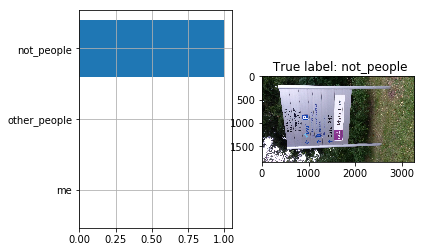

In [15]:
interpreter.plot_prediction(0)

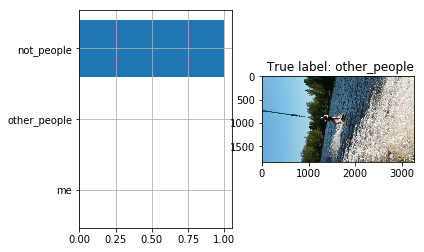

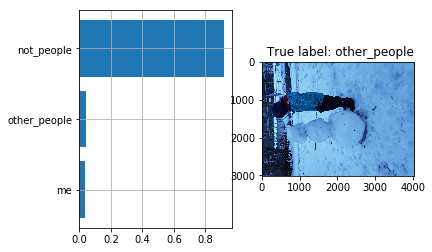

In [18]:
interpreter.plot_most_incorrect_samples(2)